**1.Масштабирование признаков (не менее чем тремя способами);**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
housing = fetch_california_housing()
data = pd.DataFrame(housing.data,
                      columns=housing.feature_names)
data['Y'] = housing.target
data.shape

(20640, 9)

In [ ]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Нужно ли масштабирование
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Y
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# DataFrame не содержащий целевой признак
X_ALL = data.drop('Y', axis=1)

In [ ]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [ ]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Y'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((16512, 8), (4128, 8))

In [ ]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

## MinMax-масштабирование

In [ ]:
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572,0.476125
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.199555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715,0.253984
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784,0.583665
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416,0.631474
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

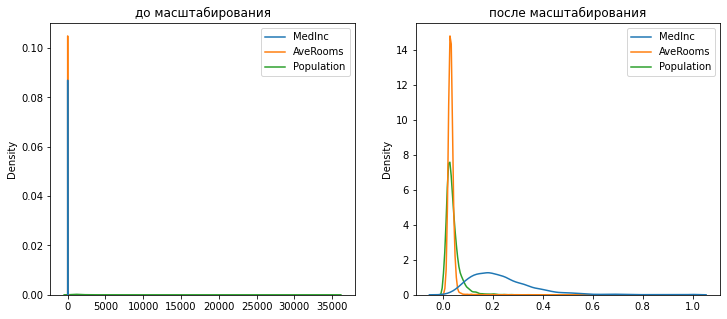

In [ ]:
draw_kde(['MedInc', 'AveRooms', 'Population'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

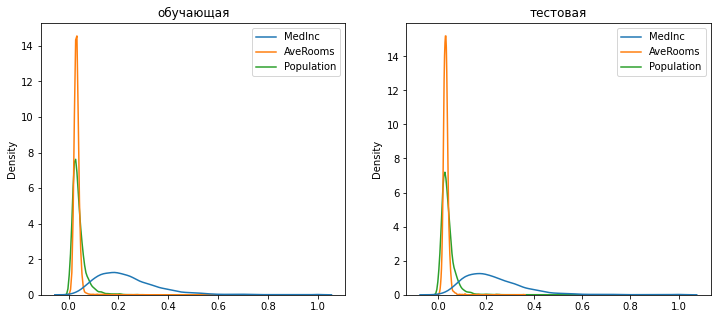

In [ ]:
draw_kde(['MedInc', 'AveRooms', 'Population'], data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

**Масштабирование данных на основе Z-оценки**

In [ ]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


In [ ]:
data_cs11_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00


In [ ]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

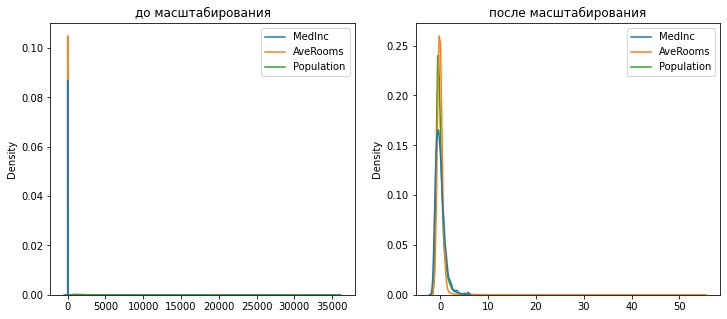

In [ ]:
draw_kde(['MedInc', 'AveRooms', 'Population'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [ ]:
# Обучаем StandardScaler на обучающей выборке 
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [ ]:
data_cs12_scaled_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-1.663183e-16,5.239134e-17,1.912768e-16,2.119321e-16,2.280691e-17,1.183377e-18,3.050962e-16,-1.818528e-15
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-1.784934e+00,-2.193326e+00,-1.758064e+00,-1.510898e+00,-1.265666e+00,-2.022041e-01,-1.446964e+00,-2.354008e+00
25%,-6.894428e-01,-8.425832e-01,-3.830692e-01,-1.840409e-01,-5.688744e-01,-5.757397e-02,-7.965259e-01,-1.113670e+00
50%,-1.753078e-01,3.142707e-02,-8.210226e-02,-1.001681e-01,-2.324925e-01,-2.427528e-02,-6.421054e-01,5.401142e-01
75%,4.619818e-01,6.670709e-01,2.359401e-01,-4.655013e-05,2.649611e-01,1.542318e-02,9.722905e-01,7.792156e-01
max,5.880939e+00,1.858903e+00,5.221361e+01,6.500353e+01,3.048505e+01,1.069443e+02,2.956360e+00,2.622289e+00


In [ ]:
data_cs12_scaled_test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-0.014481,0.013911,-0.023175,-0.028812,0.000977,-0.010484,-0.000777,0.011417
std,1.021662,0.999880,0.692871,0.604269,1.038310,0.100045,0.997493,0.989980
min,-1.784934,-2.113871,-1.521001,-1.428741,-1.258546,-0.207179,-1.437605,-2.378915
25%,-0.712242,-0.842583,-0.381876,-0.186036,-0.564647,-0.056193,-0.791846,-1.058876
50%,-0.198860,0.031427,-0.076683,-0.101062,-0.220479,-0.021970,-0.642105,0.530152
75%,0.451514,0.667071,0.224293,-0.000800,0.271190,0.019040,0.976970,0.784197
max,5.880939,1.858903,17.369108,18.082473,24.152526,4.165286,2.914245,2.502738


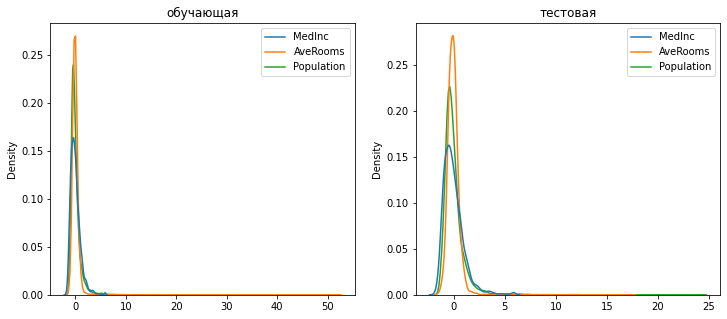

In [ ]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde(['MedInc', 'AveRooms', 'Population'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

**Масштабирование по максимальному значению**

In [ ]:
cs51 = MaxAbsScaler()
data_cs51_scaled_temp = cs51.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs51_scaled = arr_to_df(data_cs51_scaled_temp)
data_cs51_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.258043,0.550759,0.038257,0.032192,0.039949,0.002470,0.849389,-0.961558
std,0.126654,0.242030,0.017435,0.013911,0.031738,0.008353,0.050917,0.016112
min,0.033326,0.019231,0.005963,0.009785,0.000084,0.000557,0.775685,-1.000000
25%,0.170892,0.346154,0.031293,0.029533,0.022056,0.001954,0.808820,-0.979493
50%,0.235652,0.557692,0.036848,0.030786,0.032678,0.002267,0.816687,-0.952875
75%,0.316215,0.711538,0.042650,0.032276,0.048344,0.002640,0.898927,-0.949015
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.919260


In [ ]:
cs52_mas = MaxAbsScaler()
cs52_mean = StandardScaler(with_mean=True, with_std=False)

cs52_mas.fit(X_train)
cs52_mean.fit(X_train)

data_cs52_scaled_train_temp = cs52_mas.transform(cs52_mean.transform(X_train))
data_cs52_scaled_test_temp = cs52_mas.transform(cs52_mean.transform(X_test))
# формируем DataFrame на основе массива
data_cs52_scaled_train = arr_to_df(data_cs52_scaled_train_temp)
data_cs52_scaled_test = arr_to_df(data_cs52_scaled_test_temp)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MaxAbsScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MaxAbsScaler was fitted with feature names
  warnings.warn(


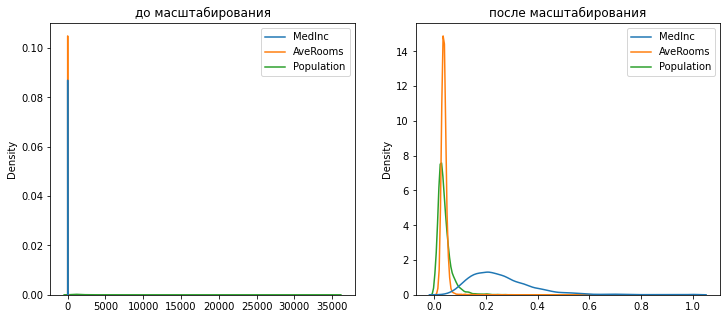

In [ ]:
draw_kde(['MedInc', 'AveRooms', 'Population'], data, data_cs51_scaled, 'до масштабирования', 'после масштабирования')

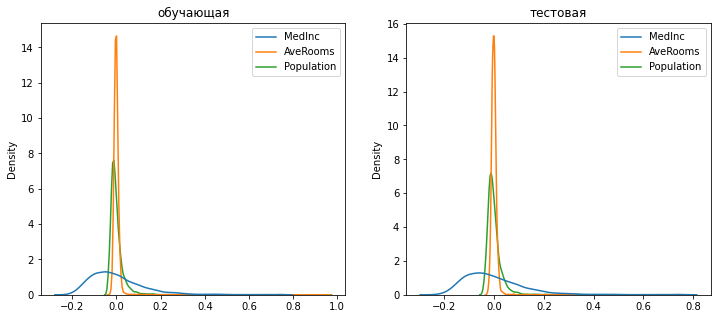

In [ ]:
draw_kde(['MedInc', 'AveRooms', 'Population'], data_cs52_scaled_train, data_cs52_scaled_test, 'обучающая', 'тестовая')

**Масштабирование по медиане**

In [ ]:
cs41 = RobustScaler()
data_cs41_scaled_temp = cs41.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs41_scaled = arr_to_df(data_cs41_scaled_temp)
data_cs41_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,1.540799e-01,-0.018974,0.124015,0.512533,0.276628,0.296227,0.362926,-0.284882
std,8.715378e-01,0.662398,1.535166,5.071439,1.207316,12.182767,0.565067,0.528636
min,-1.392252e+00,-1.473684,-2.719533,-7.656179,-1.239872,-2.493559,-0.455026,-1.546174
25%,-4.456270e-01,-0.578947,-0.489191,-0.456959,-0.404051,-0.455561,-0.087302,-0.873351
50%,1.018608e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.543730e-01,0.421053,0.510809,0.543041,0.595949,0.544439,0.912698,0.126649
max,5.259674e+00,1.210526,84.806698,353.332681,36.797441,1455.116059,2.034392,1.102902


In [ ]:
cs42 = RobustScaler()
cs42.fit(X_train)
data_cs42_scaled_train_temp = cs42.transform(X_train)
data_cs42_scaled_test_temp = cs42.transform(X_test)
# формируем DataFrame на основе массива
data_cs42_scaled_train = arr_to_df(data_cs42_scaled_train_temp)
data_cs42_scaled_test = arr_to_df(data_cs42_scaled_test_temp)

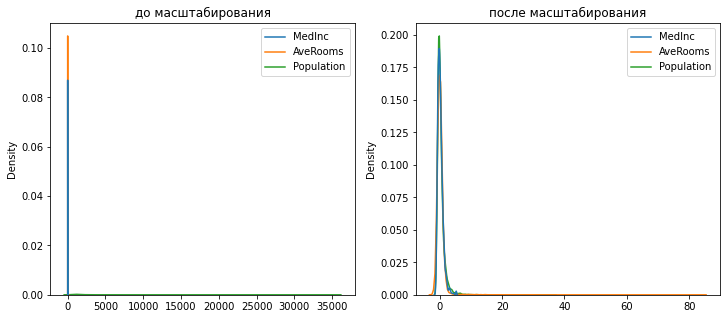

In [ ]:
draw_kde(['MedInc', 'AveRooms', 'Population'], data, data_cs41_scaled, 'до масштабирования', 'после масштабирования')

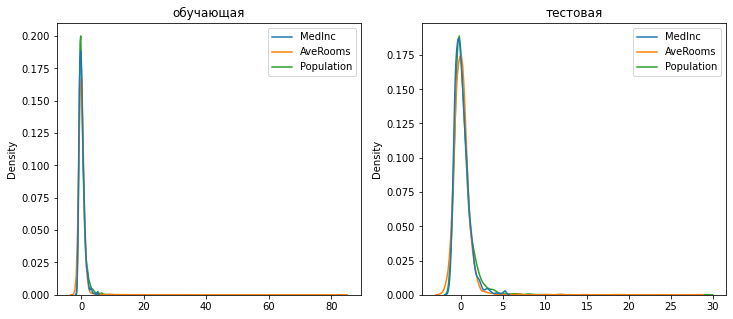

In [ ]:
draw_kde(['MedInc', 'AveRooms', 'Population'], data_cs42_scaled_train, data_cs42_scaled_test, 'обучающая', 'тестовая')

**2.Обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов)**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
x_col_list = ['AveRooms', 'HouseAge', 'MedInc']

In [ ]:
housing = fetch_california_housing()
data = pd.DataFrame(housing.data,
                      columns=housing.feature_names)
data['Y'] = housing.target
data.shape

(20640, 9)

In [ ]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

<ipython-input-27-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


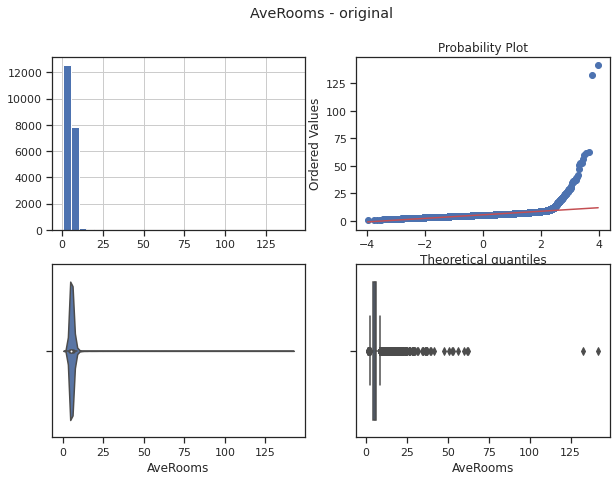

In [ ]:
diagnostic_plots(data, 'AveRooms', 'AveRooms - original')

<ipython-input-27-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


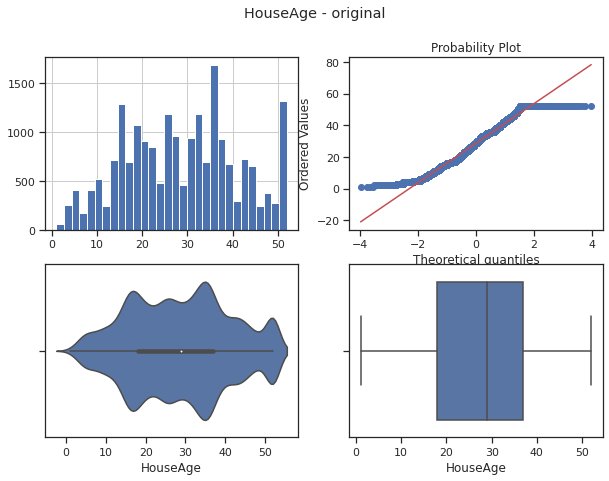

In [ ]:
diagnostic_plots(data, 'HouseAge', 'HouseAge - original')

<ipython-input-27-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


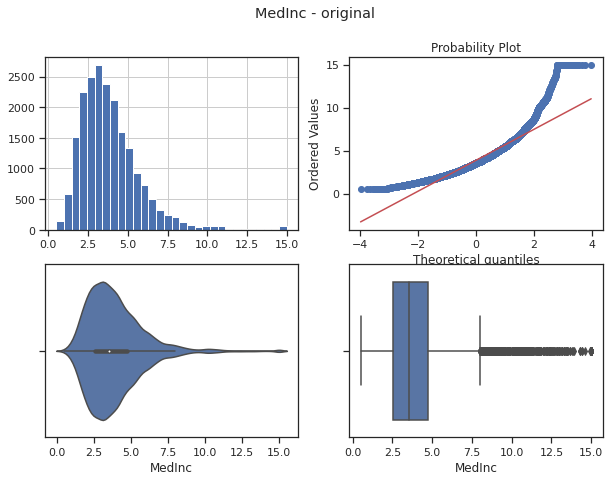

In [ ]:
diagnostic_plots(data, 'MedInc', 'MedInc - original')

In [ ]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
Y,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [ ]:
#Использование 3 sigma
def three_sigma(df):
    way = (df.mean() - 3 * df.std() < df) &(df.mean() + 3 * df.std() > df)
    index = np.arange(df.shape[0])[way] 
    output= df.iloc[index]
    return output

In [ ]:
for col in data.columns:
    data[col]=three_sigma(data[col])

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20295.0,3.738741,1.604919,0.499900,2.550750,3.507600,4.667050,9.556100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20507.0,5.301245,1.285753,0.846154,4.435479,5.219810,6.029049,12.808511
AveBedrms,20495.0,1.069311,0.137882,0.333333,1.005747,1.048128,1.098000,2.514610
Population,20298.0,1333.286974,814.376106,3.000000,781.000000,1154.000000,1687.000000,4819.000000
AveOccup,20632.0,2.935397,0.904044,0.692308,2.429301,2.817800,3.281506,33.952941
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
Y,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


**Использование межквартильного размаха**

In [ ]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [ ]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary 

**Удаление выбросов**

In [ ]:
data.shape

(20640, 9)

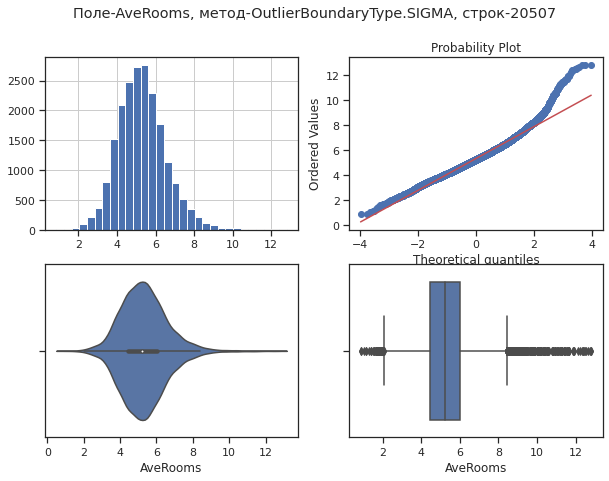

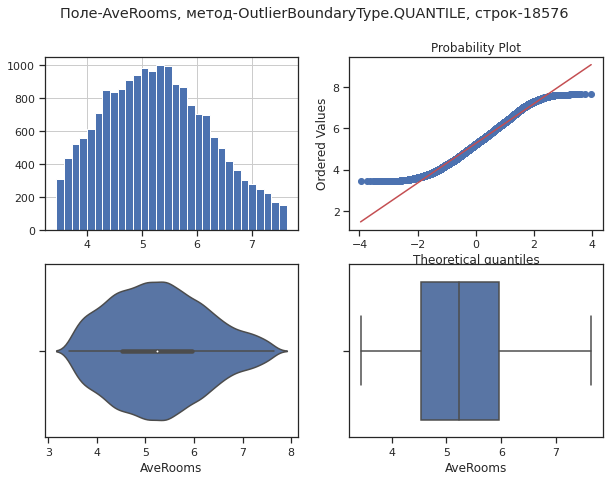

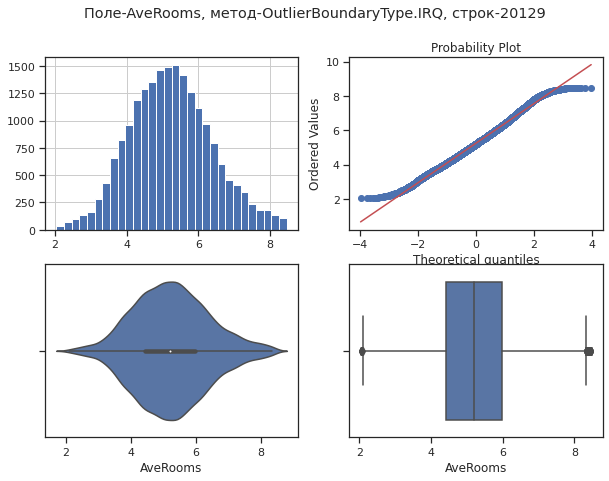

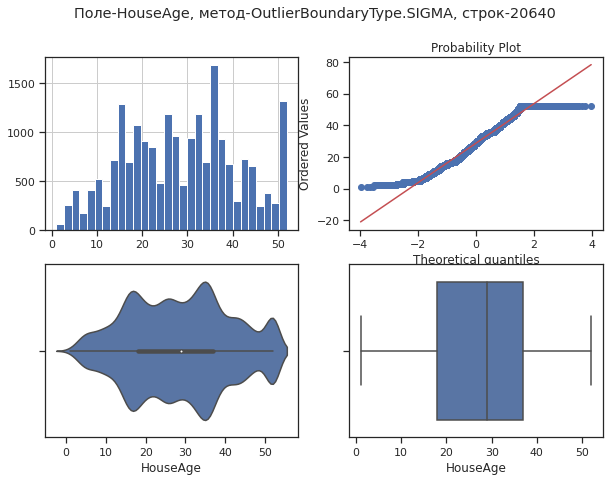

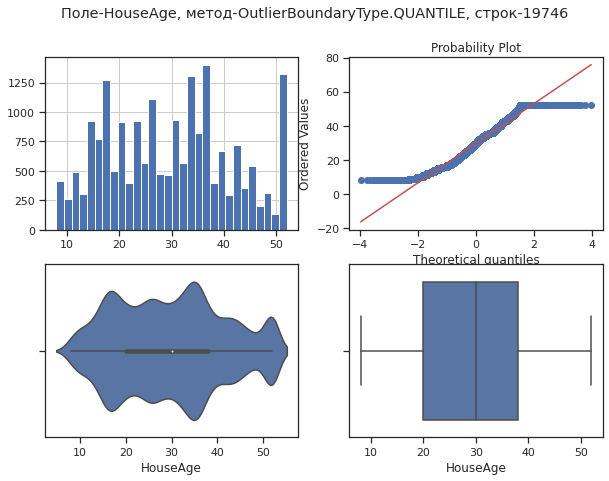

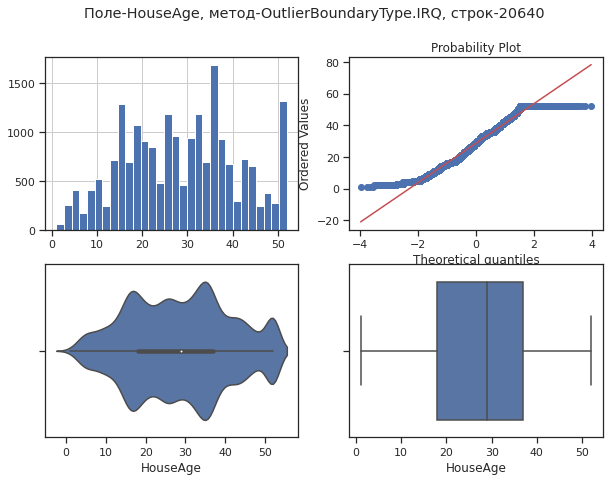

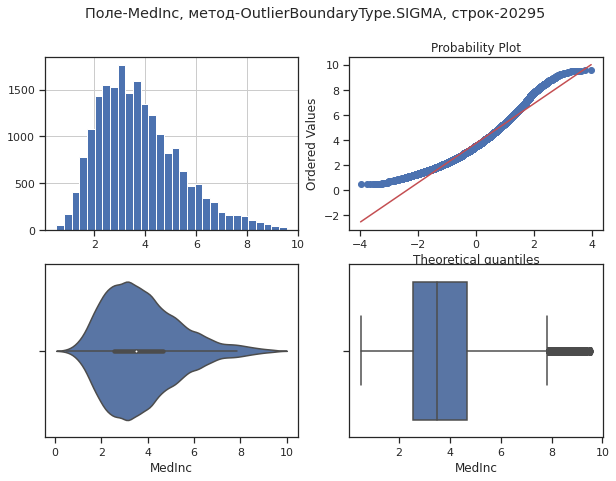

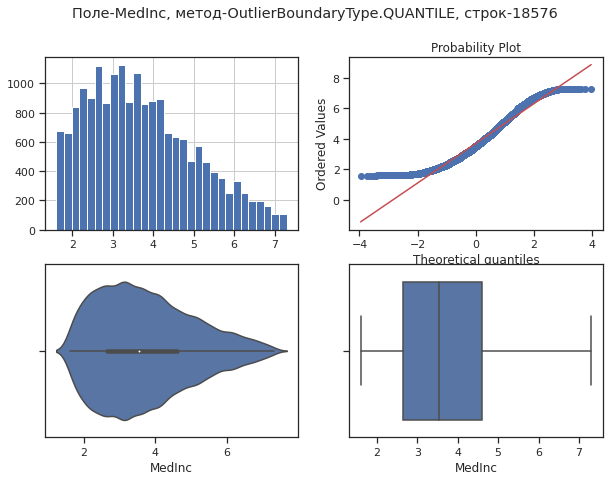

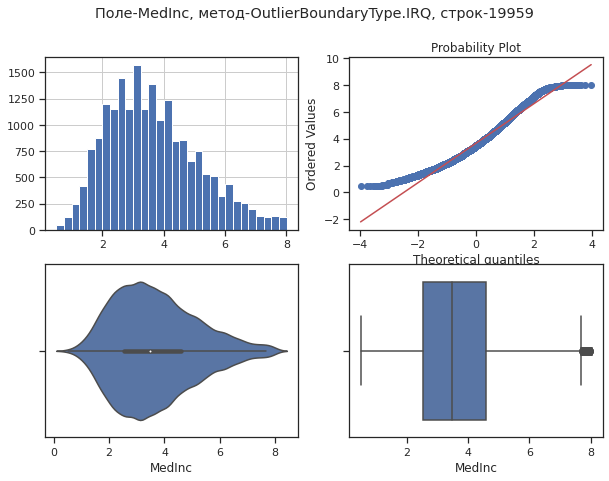

In [ ]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

**Замена выбросов**

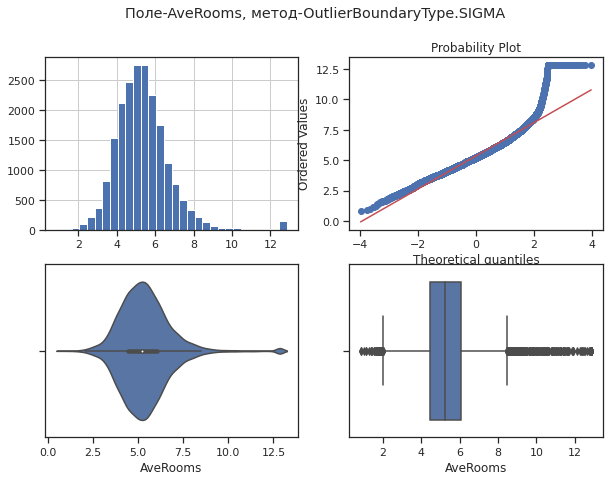

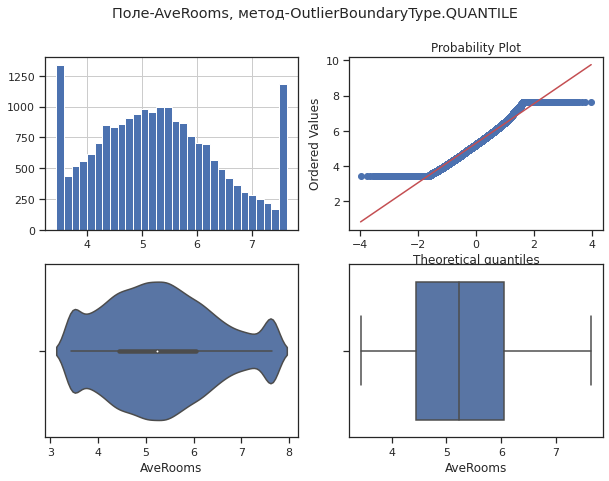

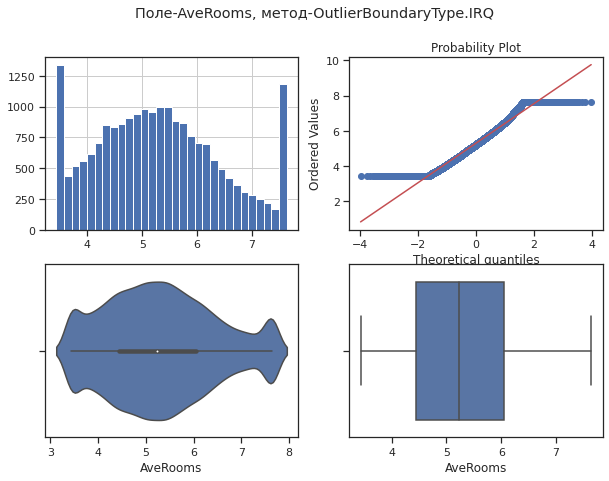

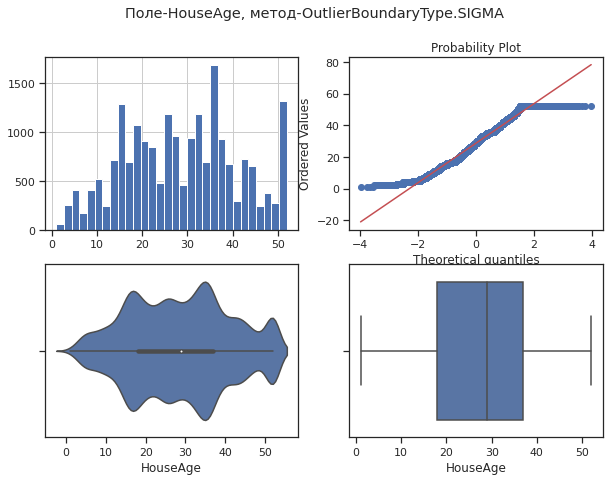

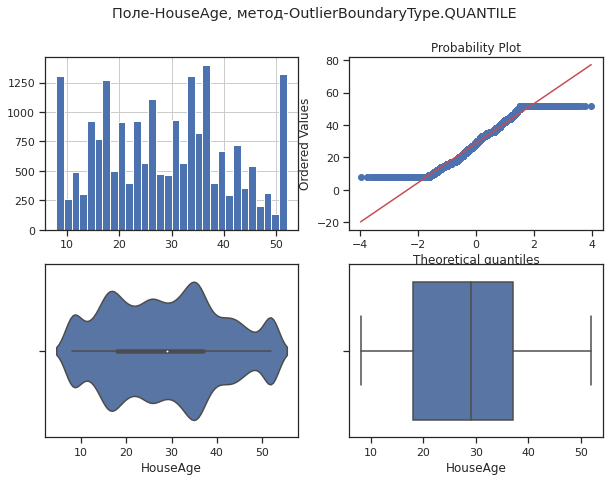

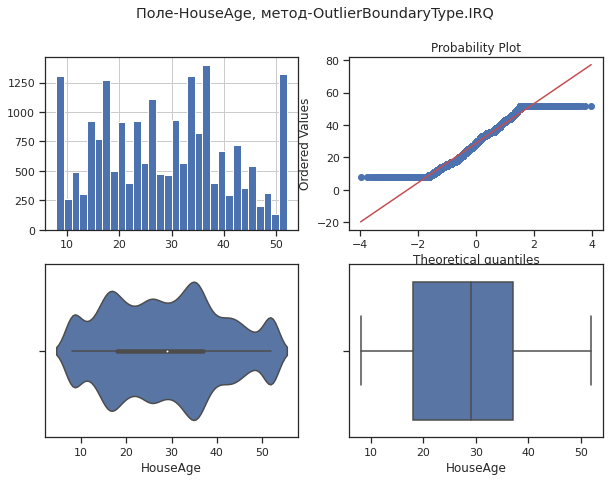

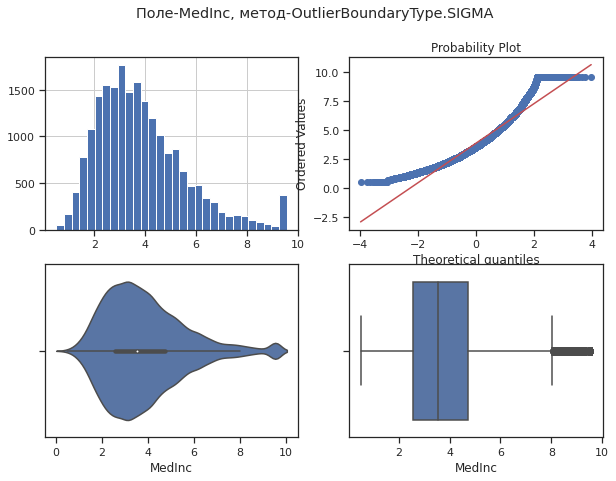

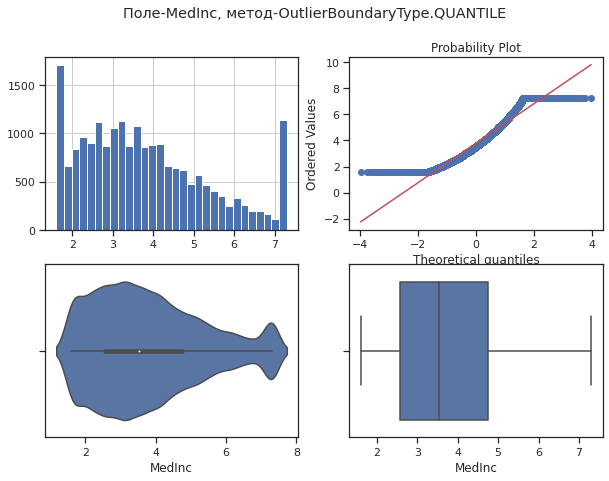

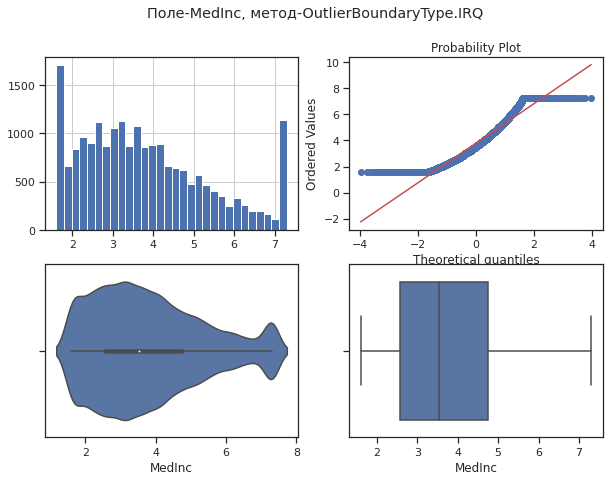

In [ ]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data, col, title)

**3.Обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным)**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import ipaddress
import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
data = pd.read_csv('Movies.csv', sep=',')

In [ ]:
data.shape

(853, 13)

In [ ]:
data.head()

,index,Title,Release Date,Year,Description,URL,Rating,Runtime,Genres,Votes,Directors,Series,Order
0,0,101 Dalmatians,18-11-1996,1996,NaN,https://www.imdb.com/title/tt0115433/,5.7,103.0,"Adventure, Comedy, Crime, Family",98439.0,Stephen Herek,101 Dalmatians,1
1,1,102 Dalmatians,22-11-2000,2000,NaN,https://www.imdb.com/title/tt0211181/,4.9,100.0,"Adventure, Comedy, Family",33823.0,Kevin Lima,101 Dalmatians,2
2,2,12 Rounds,19-03-2009,2009,NaN,https://www.imdb.com/title/tt1160368/,5.6,108.0,"Action, Crime, Thriller",26828.0,Renny Harlin,12 Rounds,1
3,3,12 Rounds 2: Reloaded,04-06-2013,2013,NaN,https://www.imdb.com/title/tt2317524/,5.3,95.0,"Action, Adventure, Thriller",5141.0,Roel Reiné,12 Rounds,2
4,4,21 Jump Street,12-03-2012,2012,NaN,https://www.imdb.com/title/tt1232829/,7.2,109.0,"Action, Comedy, Crime",498876.0,"Christopher Miller, Phil Lord",21 Jump Street,1


In [ ]:
# Целевой признак
data['Order'].value_counts()

1     364
2     262
3     113
4      52
5      24
6      14
7       9
8       5
9       3
10      2
11      2
12      1
13      1
14      1
Name: Order, dtype: int64

In [ ]:
# Закодируем целевой признак
target_le = LabelEncoder()
data['order_le'] = target_le.fit_transform(data['Order'])
data['order_le'].unique(), target_le.inverse_transform(data['order_le'].unique())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]))

In [ ]:
data.dtypes

index             int64
Title            object
Release Date     object
Year              int64
Description     float64
URL              object
Rating          float64
Runtime         float64
Genres           object
Votes           float64
Directors        object
Series           object
Order             int64
order_le          int64
dtype: object

**Выделение признаков из URL-адреса**

In [ ]:
# Проверка наличия подстроки в URL
def substr_in_url(substr):
    lsubstr = substr.lower()
    return data.apply(lambda x: 1 if lsubstr in x['URL'].lower() else 0, axis=1)

In [ ]:
data['is_get'] = substr_in_url('GET')
data['is_php'] = substr_in_url('PHP')
data['is_js'] = substr_in_url('JS')
data['is_woff'] = substr_in_url('WOFF')
url_features = ['is_get', 'is_php', 'is_js', 'is_woff']

In [ ]:
data.head()

,index,Title,Release Date,Year,Description,URL,Rating,Runtime,Genres,Votes,Directors,Series,Order,order_le,is_get,is_php,is_js,is_woff
0,0,101 Dalmatians,18-11-1996,1996,NaN,https://www.imdb.com/title/tt0115433/,5.7,103.0,"Adventure, Comedy, Crime, Family",98439.0,Stephen Herek,101 Dalmatians,1,0,0,0,0,0
1,1,102 Dalmatians,22-11-2000,2000,NaN,https://www.imdb.com/title/tt0211181/,4.9,100.0,"Adventure, Comedy, Family",33823.0,Kevin Lima,101 Dalmatians,2,1,0,0,0,0
2,2,12 Rounds,19-03-2009,2009,NaN,https://www.imdb.com/title/tt1160368/,5.6,108.0,"Action, Crime, Thriller",26828.0,Renny Harlin,12 Rounds,1,0,0,0,0,0
3,3,12 Rounds 2: Reloaded,04-06-2013,2013,NaN,https://www.imdb.com/title/tt2317524/,5.3,95.0,"Action, Adventure, Thriller",5141.0,Roel Reiné,12 Rounds,2,1,0,0,0,0
4,4,21 Jump Street,12-03-2012,2012,NaN,https://www.imdb.com/title/tt1232829/,7.2,109.0,"Action, Comedy, Crime",498876.0,"Christopher Miller, Phil Lord",21 Jump Street,1,0,0,0,0,0


**Обработка даты**

In [ ]:
data['Release Date']=pd.to_datetime(data['Release Date'])

<ipython-input-134-d5c2ff3090a1>:1: UserWarning: Parsing '18-11-1996' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Release Date']=pd.to_datetime(data['Release Date'])
<ipython-input-134-d5c2ff3090a1>:1: UserWarning: Parsing '22-11-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Release Date']=pd.to_datetime(data['Release Date'])
<ipython-input-134-d5c2ff3090a1>:1: UserWarning: Parsing '19-03-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Release Date']=pd.to_datetime(data['Release Date'])
<ipython-input-134-d5c2ff3090a1>:1: UserWarning: Parsing '26-04-2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Release Date']=pd.to_datetime(data['Release Date'])
<ipython-input-134-d5c2ff3090a1>:1: UserWarning: Parsing '16-10-2007' in DD/MM/YYYY 

In [ ]:
data.dtypes

index                    int64
Title                   object
Release Date    datetime64[ns]
Year                     int64
Description            float64
URL                     object
Rating                 float64
Runtime                float64
Genres                  object
Votes                  float64
Directors               object
Series                  object
Order                    int64
order_le                 int64
is_get                   int64
is_php                   int64
is_js                    int64
is_woff                  int64
dtype: object

**Выделение стандартных признаков даты и времени**

In [ ]:
# День
data['day'] = data['Release Date'].dt.day
# Месяц
data['month'] = data['Release Date'].dt.month
# Год
data['year'] = data['Release Date'].dt.year

In [ ]:
data.head()

,index,Title,Release Date,Year,Description,URL,Rating,Runtime,Genres,Votes,...,Series,Order,order_le,is_get,is_php,is_js,is_woff,day,month,year
0,0,101 Dalmatians,1996-11-18,1996,NaN,https://www.imdb.com/title/tt0115433/,5.7,103.0,"Adventure, Comedy, Crime, Family",98439.0,...,101 Dalmatians,1,0,0,0,0,0,18,11,1996
1,1,102 Dalmatians,2000-11-22,2000,NaN,https://www.imdb.com/title/tt0211181/,4.9,100.0,"Adventure, Comedy, Family",33823.0,...,101 Dalmatians,2,1,0,0,0,0,22,11,2000
2,2,12 Rounds,2009-03-19,2009,NaN,https://www.imdb.com/title/tt1160368/,5.6,108.0,"Action, Crime, Thriller",26828.0,...,12 Rounds,1,0,0,0,0,0,19,3,2009
3,3,12 Rounds 2: Reloaded,2013-04-06,2013,NaN,https://www.imdb.com/title/tt2317524/,5.3,95.0,"Action, Adventure, Thriller",5141.0,...,12 Rounds,2,1,0,0,0,0,6,4,2013
4,4,21 Jump Street,2012-12-03,2012,NaN,https://www.imdb.com/title/tt1232829/,7.2,109.0,"Action, Comedy, Crime",498876.0,...,21 Jump Street,1,0,0,0,0,0,3,12,2012


In [ ]:
# Создадим масштабируемые признаки для дальнейших экспериментов
dt_features = ['year', 'day', 'month']
dt_features_scaled = []
for f in dt_features:
    f_new = str(f + '_scaled')
    dt_features_scaled.append(f_new)
    data[f_new] = MinMaxScaler().fit_transform(data[[f]])
dt_features_scaled

['year_scaled', 'day_scaled', 'month_scaled']

In [ ]:
data.head()

,index,Title,Release Date,Year,Description,URL,Rating,Runtime,Genres,Votes,...,is_get,is_php,is_js,is_woff,day,month,year,year_scaled,day_scaled,month_scaled
0,0,101 Dalmatians,1996-11-18,1996,NaN,https://www.imdb.com/title/tt0115433/,5.7,103.0,"Adventure, Comedy, Crime, Family",98439.0,...,0,0,0,0,18,11,1996,0.6750,0.566667,0.909091
1,1,102 Dalmatians,2000-11-22,2000,NaN,https://www.imdb.com/title/tt0211181/,4.9,100.0,"Adventure, Comedy, Family",33823.0,...,0,0,0,0,22,11,2000,0.7250,0.700000,0.909091
2,2,12 Rounds,2009-03-19,2009,NaN,https://www.imdb.com/title/tt1160368/,5.6,108.0,"Action, Crime, Thriller",26828.0,...,0,0,0,0,19,3,2009,0.8375,0.600000,0.181818
3,3,12 Rounds 2: Reloaded,2013-04-06,2013,NaN,https://www.imdb.com/title/tt2317524/,5.3,95.0,"Action, Adventure, Thriller",5141.0,...,0,0,0,0,6,4,2013,0.8875,0.166667,0.272727
4,4,21 Jump Street,2012-12-03,2012,NaN,https://www.imdb.com/title/tt1232829/,7.2,109.0,"Action, Comedy, Crime",498876.0,...,0,0,0,0,3,12,2012,0.8750,0.066667,1.000000


**4.Отбор признаков**

**1) один метод из группы методов фильтрации (filter methods)**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_california_housing
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
iris = load_iris()
iris_X = iris.data
iris_y = iris.target
iris_feature_names = iris['feature_names']
iris_x_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

In [ ]:
housing = fetch_california_housing()
housing_X = housing.data
housing_y = housing.target
housing_feature_names = housing['feature_names']
housing_x_df = pd.DataFrame(data=housing['data'], columns=housing['feature_names'])

**Методы, основанные на корреляции**

In [ ]:
housing = fetch_california_housing()
data = pd.DataFrame(housing.data,
                      columns=housing.feature_names)
data['Y'] = housing.target
data.shape

(20640, 9)

<Axes: >

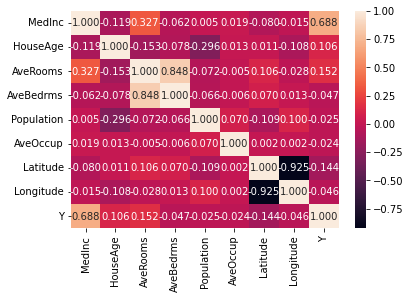

In [ ]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

In [ ]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [ ]:
make_corr_df(data)

,f1,f2,corr
0,Longitude,Latitude,0.924664
1,Latitude,Longitude,0.924664
2,AveRooms,AveBedrms,0.847621
3,AveBedrms,AveRooms,0.847621


In [ ]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [ ]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data))

[['Latitude', 'Longitude'], ['AveBedrms', 'AveRooms']]

**2)Один метод из группы методов обертывания (wrapper methods)**

In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
knn = KNeighborsClassifier(n_neighbors=3)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(iris_X, iris_y, custom_feature_names=iris_feature_names)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)


Features: 11/11

Best accuracy score: 0.97
Best subset (indices): (0, 2, 3)
Best subset (corresponding names): ('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')


In [ ]:
efs2 = EFS(knn, 
           min_features=1,
           max_features=2,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs2 = efs2.fit(iris_X, iris_y, custom_feature_names=iris_feature_names)

print('Best accuracy score: %.2f' % efs2.best_score_)
print('Best subset (indices):', efs2.best_idx_)
print('Best subset (corresponding names):', efs2.best_feature_names_)

Features: 10/10

Best accuracy score: 0.96
Best subset (indices): (3,)
Best subset (corresponding names): ('petal width (cm)',)


**3)Один метод из группы методов вложений (embedded methods).**

**Использование линейных моделей**

**Линейная регрессия**

In [ ]:
# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(housing_X, housing_y)
# Коэффициенты регрессии
list(zip(housing_feature_names, e_ls1.coef_))

[('MedInc', 0.1454692320524941),
 ('HouseAge', 0.005814968844496919),
 ('AveRooms', 0.0),
 ('AveBedrms', -0.0),
 ('Population', -6.372926073320524e-06),
 ('AveOccup', -0.0),
 ('Latitude', -0.0),
 ('Longitude', -0.0)]

In [ ]:
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(housing_X, housing_y)
list(zip(housing_feature_names, sel_e_ls1.get_support()))

[('MedInc', True),
 ('HouseAge', True),
 ('AveRooms', False),
 ('AveBedrms', False),
 ('Population', False),
 ('AveOccup', False),
 ('Latitude', False),
 ('Longitude', False)]

**Использование моделей на основе решающего дерева**

**Задача регрессии**

In [ ]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, title, figsize=(7,4)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.1, b+0.005, str(round(b,3)))
    plt.show()
    return labels, data

In [ ]:
dtr1 = DecisionTreeRegressor()
rfr1 = RandomForestRegressor()
gbr1 = GradientBoostingRegressor()
dtr1.fit(housing_X, housing_y)
rfr1.fit(housing_X, housing_y)
gbr1.fit(housing_X, housing_y)

# Важность признаков
dtr1.feature_importances_, sum(dtr1.feature_importances_)

(array([0.52497546, 0.05076972, 0.05358679, 0.02674551, 0.03229779,
        0.13148761, 0.09481681, 0.0853203 ]), 0.9999999999999998)

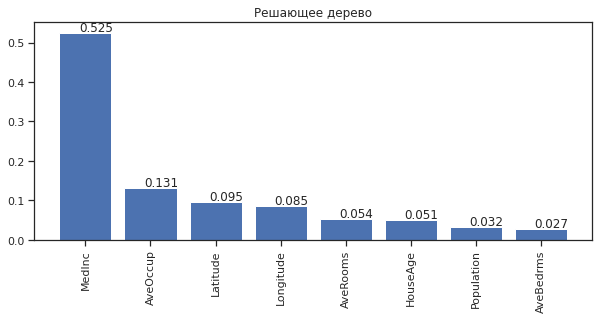

In [ ]:
_,_=draw_feature_importances(dtr1, housing_x_df, 'Решающее дерево', figsize=(10,4))

In [ ]:
list(zip(housing_feature_names, SelectFromModel(dtr1).fit(housing_X, housing_y).get_support()))

[('MedInc', True),
 ('HouseAge', False),
 ('AveRooms', False),
 ('AveBedrms', False),
 ('Population', False),
 ('AveOccup', True),
 ('Latitude', False),
 ('Longitude', False)]

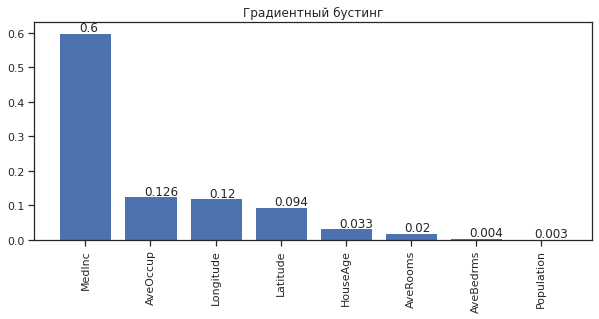

In [ ]:
_,_=draw_feature_importances(gbr1, housing_x_df, 'Градиентный бустинг', figsize=(10,4))

In [ ]:
list(zip(housing_feature_names, SelectFromModel(gbr1).fit(housing_X, housing_y).get_support()))

[('MedInc', True),
 ('HouseAge', False),
 ('AveRooms', False),
 ('AveBedrms', False),
 ('Population', False),
 ('AveOccup', True),
 ('Latitude', False),
 ('Longitude', False)]

In [ ]:
list(zip(housing_feature_names, SelectFromModel(gbr1, threshold='0.25*mean').fit(housing_X, housing_y).get_support()))

[('MedInc', True),
 ('HouseAge', True),
 ('AveRooms', False),
 ('AveBedrms', False),
 ('Population', False),
 ('AveOccup', True),
 ('Latitude', True),
 ('Longitude', True)]

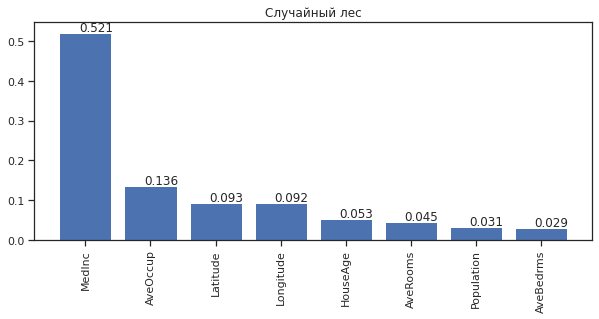

In [ ]:
_,_=draw_feature_importances(rfr1, housing_x_df, 'Случайный лес', figsize=(10,4))

In [ ]:
list(zip(housing_feature_names, SelectFromModel(rfr1).fit(housing_X, housing_y).get_support()))

[('MedInc', True),
 ('HouseAge', False),
 ('AveRooms', False),
 ('AveBedrms', False),
 ('Population', False),
 ('AveOccup', True),
 ('Latitude', False),
 ('Longitude', False)]

In [ ]:
list(zip(housing_feature_names, SelectFromModel(rfr1, threshold='0.1*mean').fit(housing_X, housing_y).get_support()))

[('MedInc', True),
 ('HouseAge', True),
 ('AveRooms', True),
 ('AveBedrms', True),
 ('Population', True),
 ('AveOccup', True),
 ('Latitude', True),
 ('Longitude', True)]